# Equipo
## Kevin Antonio González Díaz (A01338316)
## Pablo Monzon Terrazas (A01562619)
## Ángel David Ávila Pérez (A01562833)
## Luis Maximiliano López Ramírez (A00833321)
## Adrian Pineda Sanchez (A00834710)

In [ ]:
pip install kmapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install tadasets

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install yfinance

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tadasets
import pandas as pd
import yfinance as yf
from sklearn.manifold import Isomap
import umap

In [ ]:
tickers_path = '/content/SP500_tickernames (1).txt'
tickers = pd.read_csv(tickers_path, header=None).squeeze().tolist()

start_date = '2020-01-01'
end_date = '2022-04-30'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  495 of 495 completed
ERROR:yfinance:
25 Failed downloads:
ERROR:yfinance:['DISCA', 'XLNX', 'INFO', 'RE', 'ANTM', 'ABC', 'ATVI', 'PKI', 'CERN', 'CTXS', 'DISH', 'NLSN', 'VIAC', 'DISCK', 'FRC', 'FBHS', 'BLL', 'PBCT', 'TWTR', 'NLOK', 'FB', 'CDAY', 'DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['FISV']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1651291200")
ERROR:yfinance:['SIVB']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [ ]:
data_clean = data.dropna(axis=1)

data_clean = data_clean.pct_change().dropna()

data_clean = data_clean.T

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

data_final = pd.DataFrame(data_scaled, columns=data_clean.columns, index=data_clean.index)

data_final

Date,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29
Ticker,,,,,,,,,,,,,,,,,,,,,
A,-0.743183,0.174848,0.226120,0.572889,1.046749,0.603454,-0.662454,0.397718,0.473519,0.000328,...,-1.236753,0.174734,0.645373,-0.799948,-0.166771,-0.120369,-0.238598,-0.203491,0.394574,0.917153
AAL,-3.078054,-1.074823,-0.169831,1.687228,-0.107876,-1.968758,-0.349882,0.316131,0.029894,1.368513,...,-1.483154,2.081990,-0.509440,2.512556,1.256032,-0.741506,-1.800757,0.493995,0.218971,-0.179062
AAP,0.382074,-1.452422,-0.652698,-1.271737,-0.681669,-2.234715,-2.491737,2.031718,0.609527,0.198260,...,0.019563,0.152024,0.666971,0.188619,-0.171609,1.238218,1.092649,0.265625,-3.437193,-0.901612
AAPL,-0.300993,0.595453,-0.231229,1.109448,1.589492,0.465437,1.102466,-1.284850,-0.476679,0.296282,...,0.062499,-0.240807,-0.320144,0.471869,0.018351,0.200078,-0.654429,-0.163474,1.039730,-0.329740
ABBV,-0.284947,0.589062,-0.290204,0.332337,0.260934,-1.007663,-1.016149,0.723401,0.876887,-0.920185,...,-1.075404,-2.043745,-0.186232,1.256016,0.284286,0.297056,1.149537,0.416161,-1.059289,-1.685518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.159056,-0.122675,0.149766,-0.127253,0.282702,-0.967106,-1.573259,0.202243,0.307731,-0.037709,...,0.262272,-0.359915,0.071647,0.225064,0.565649,-0.703114,-0.676078,0.013684,0.146874,0.561997
ZBH,0.195215,-0.558213,-0.006099,0.754334,-1.145476,1.161652,-1.047350,-0.515905,-0.227254,-0.513761,...,-0.260434,1.330659,0.745787,-0.076892,-0.817236,0.768412,-0.225555,-0.638752,-0.180294,-0.008110
ZBRA,-0.454737,0.569156,-0.305734,-3.252744,-0.947710,0.151986,0.176741,-0.299933,-0.211249,1.482115,...,0.255364,0.697861,-1.108283,-0.299471,-0.130056,1.458982,-0.644475,-0.574896,0.522689,-0.225456


In [ ]:
from umap import UMAP

isomap = Isomap(n_components=1)
iso_transformed = isomap.fit_transform(data_final)

umap_model = UMAP(n_components=1)
umap_transformed = umap_model.fit_transform(data_final)

combined_data = np.c_[iso_transformed, umap_transformed]

combined_data

array([[-2.18288114e+01,  7.77411842e+00],
       [ 3.79678263e+01,  2.29093742e+00],
       [-8.74020305e+00,  1.18230238e+01],
       [-2.55627957e+01,  6.99149609e+00],
       [-1.33396849e+01,  9.37170315e+00],
       [-3.35858028e+01,  8.22049809e+00],
       [-1.62415177e+01,  8.36946869e+00],
       [-1.70261248e+01,  1.18336544e+01],
       [-4.68490388e+01,  6.67750025e+00],
       [-1.86936209e+01,  5.77519512e+00],
       [ 1.41178410e+01,  1.55812654e+01],
       [-1.03950526e+01,  1.14029808e+01],
       [-5.24395264e+01,  6.75884342e+00],
       [-4.70604464e+01, -7.28165436e+00],
       [-4.82060502e+01, -7.30224657e+00],
       [-2.28401578e+01, -6.74339724e+00],
       [ 3.96962289e+01,  1.65169525e+01],
       [ 5.49268907e+01,  1.70718575e+01],
       [ 4.80399588e+01,  1.63486099e+01],
       [-1.27906984e+01,  1.11894159e+01],
       [-1.72459954e+01,  9.69337940e+00],
       [-1.27239495e+01,  1.37070656e+01],
       [-2.41079841e+01,  7.86134577e+00],
       [ 3.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
mapper = km.KeplerMapper(verbose=1)

cover = km.Cover(n_cubes=10, perc_overlap=0.4)
clusterer = DBSCAN(metric='cosine')

graph = mapper.map(combined_data, data_final, clusterer=clusterer, cover=cover)

html = mapper.visualize(graph, path_html="SP500_mapper_output.html", title="S&P 500 Stocks Mapper")

KeplerMapper(verbose=1)
Mapping on data shaped (470, 586) using lens shaped (470, 2)

Creating 100 hypercubes.

Created 55 edges and 38 nodes in 0:00:00.153069.
Wrote visualization to: SP500_mapper_output.html


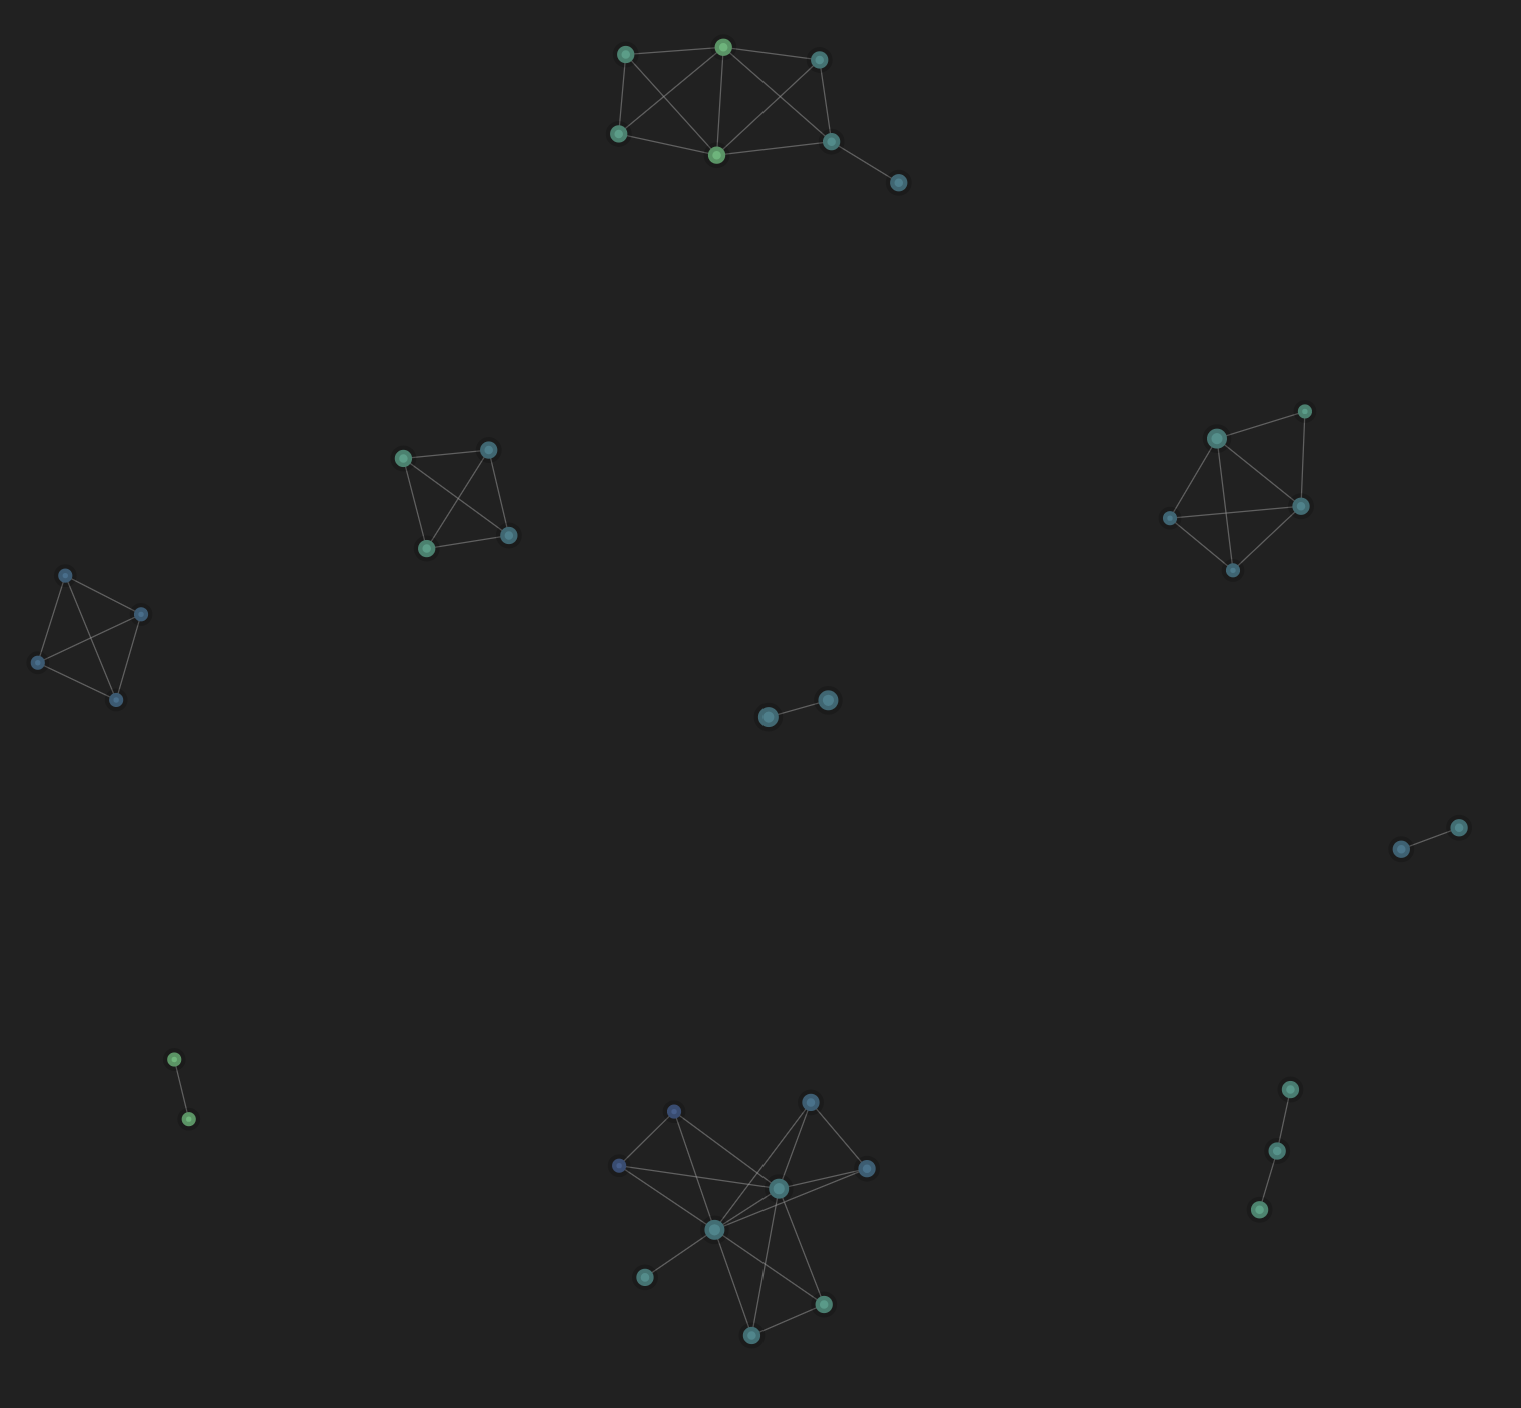

In [ ]:
data_clean = data.dropna(axis=1)

data_clean = data_clean.T

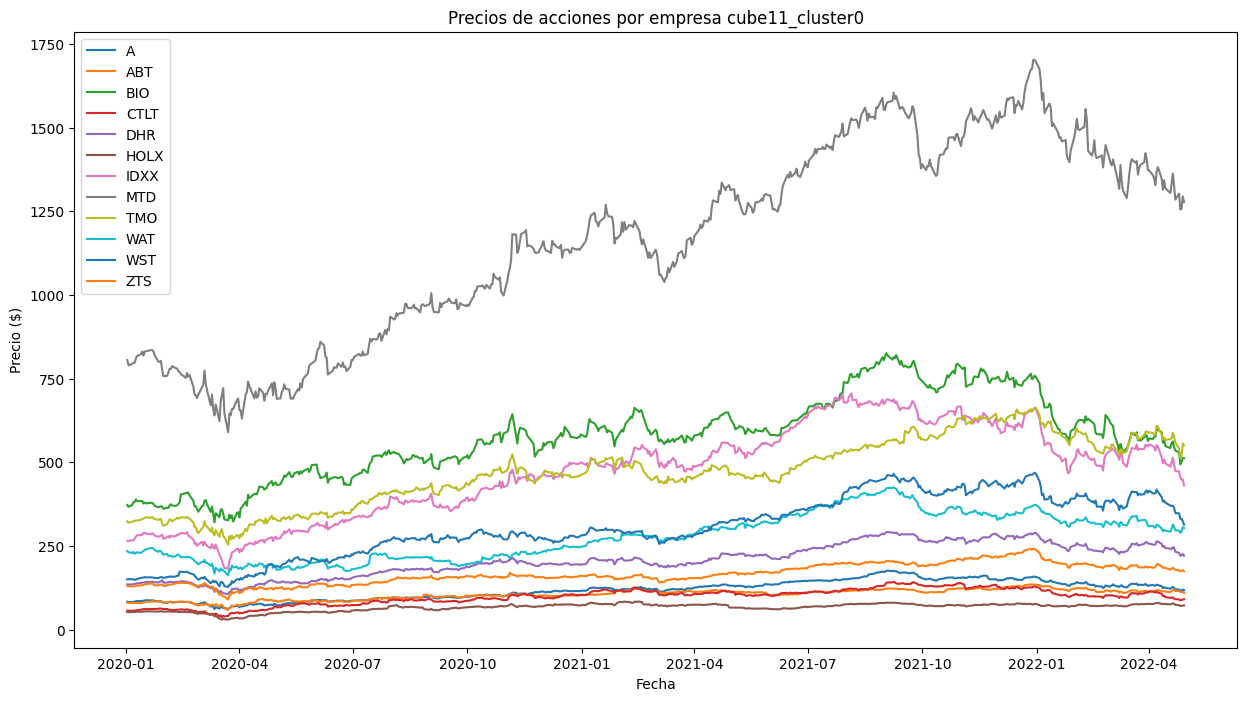

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

indices_a_graficar = graph['nodes']['cube11_cluster0']

df_filtrado = data_clean.iloc[indices_a_graficar]

df_filtrado = df_filtrado.transpose()

df_filtrado.index = pd.to_datetime(df_filtrado.index)

plt.figure(figsize=(15, 8))

for empresa in df_filtrado.columns:
    plt.plot(df_filtrado.index, df_filtrado[empresa], label=empresa)

plt.legend()
plt.title('Precios de acciones por empresa cube11_cluster0')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')

plt.show()

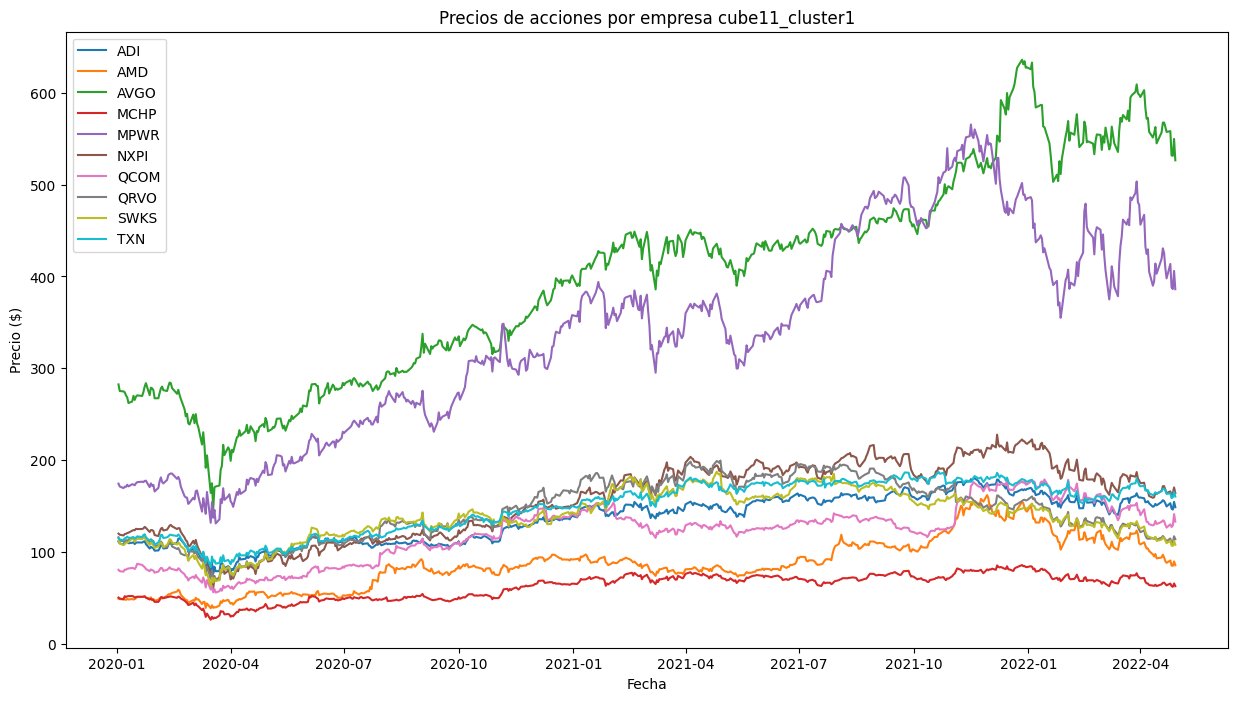

In [ ]:
indices_a_graficar = graph['nodes']['cube11_cluster1']

df_filtrado = data_clean.iloc[indices_a_graficar]

df_filtrado = df_filtrado.transpose()

df_filtrado.index = pd.to_datetime(df_filtrado.index)

plt.figure(figsize=(15, 8))

for empresa in df_filtrado.columns:
    plt.plot(df_filtrado.index, df_filtrado[empresa], label=empresa)

plt.legend()
plt.title('Precios de acciones por empresa cube11_cluster1')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')

plt.show()

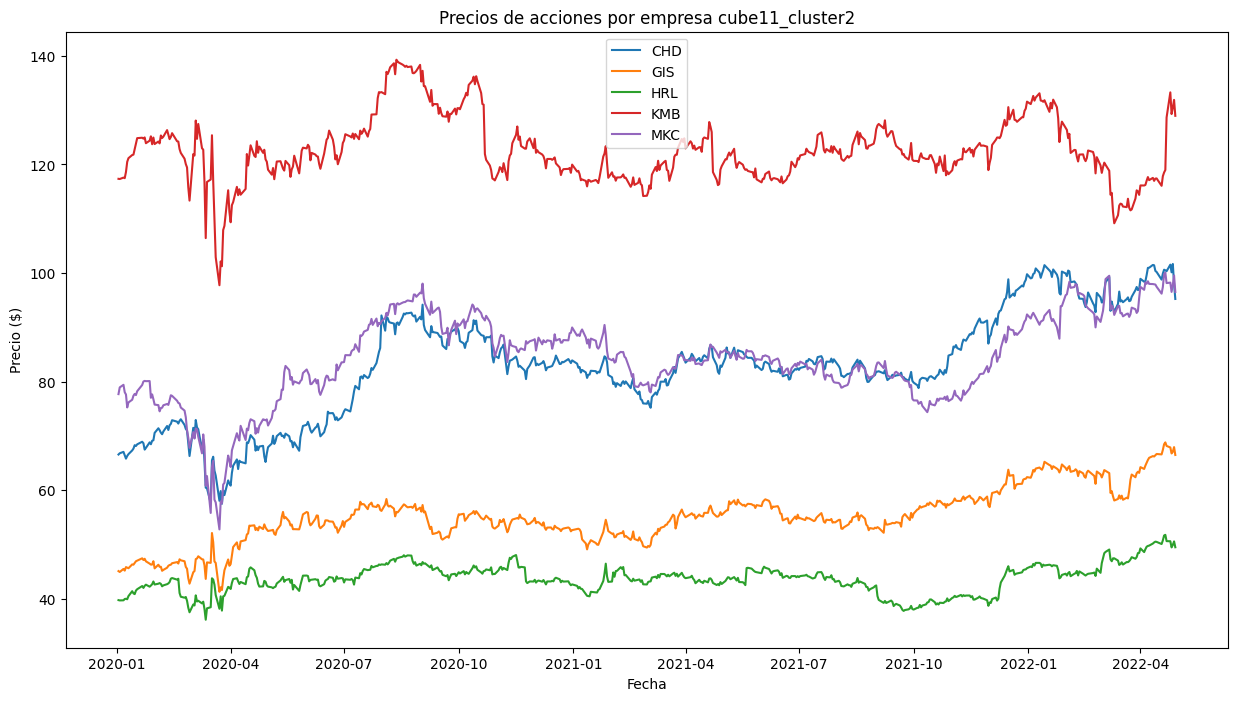

In [ ]:
indices_a_graficar = graph['nodes']['cube11_cluster2']

df_filtrado = data_clean.iloc[indices_a_graficar]

df_filtrado = df_filtrado.transpose()

df_filtrado.index = pd.to_datetime(df_filtrado.index)

plt.figure(figsize=(15, 8))

for empresa in df_filtrado.columns:
    plt.plot(df_filtrado.index, df_filtrado[empresa], label=empresa)

plt.legend()
plt.title('Precios de acciones por empresa cube11_cluster2')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')

plt.show()

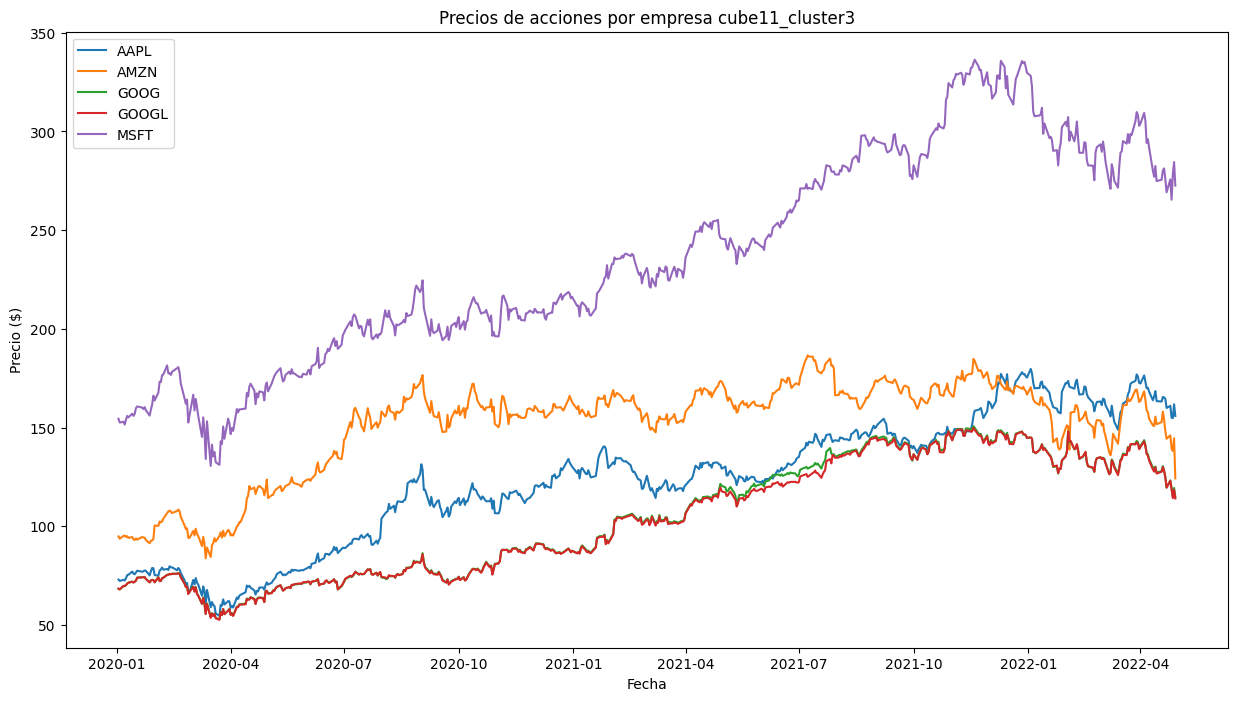

In [ ]:
indices_a_graficar = graph['nodes']['cube11_cluster3']

df_filtrado = data_clean.iloc[indices_a_graficar]

df_filtrado = df_filtrado.transpose()

df_filtrado.index = pd.to_datetime(df_filtrado.index)

plt.figure(figsize=(15, 8))

for empresa in df_filtrado.columns:
    plt.plot(df_filtrado.index, df_filtrado[empresa], label=empresa)

plt.legend()
plt.title('Precios de acciones por empresa cube11_cluster3')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')

plt.show()